## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
# MouseID=study_data_complete['Mouse ID'].value_counts()
# MouseID

#Why does .count() not work? ANS=1893
# count_MouseID = study_data_complete['Mouse ID'].count()
# count_MouseID

uniqueMouseID=study_data_complete['Mouse ID'].unique()

NumberOf_uniqueMouseID= len(uniqueMouseID)
NumberOf_uniqueMouseID

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceID=study_data_complete.duplicated(["Mouse ID", "Timepoint"])
study_data_complete[duplicateMiceID]
#duplicateMiceID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#See above


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_dd= ~study_data_complete["Mouse ID"].isin(["g989"]) 
# study_data_complete_dd.value_counts()

study_data_complete_dd_2=study_data_complete[study_data_complete_dd]

study_data_complete_dd_2

#Why does the following not drop the duplicate mouse id.... Because we want to get rid of ALL of the duplicates, we do nto want to keep one.
# study_data_complete_dd=study_data_complete.drop_duplicates(["Mouse ID"])
# study_data_complete_dd.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame. ANS=248
uniqueMouseID_dd_2=study_data_complete_dd_2['Mouse ID'].unique()

uniqueMouseID_dd_2

NumberOf_MouseID_dd_2= len(uniqueMouseID_dd_2)
NumberOf_MouseID_dd_2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#Set new index based on Drug Regimen
df = study_data_complete_dd_2.set_index("Drug Regimen")
df.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean
mean_tumor= df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor
#median
median_tumor= df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor
# #variance
variance_tumor= df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_tumor
# #Standard deviation
StandardDeviation_tumor= df.groupby(["Drug Regimen"]).agg(np.std)["Tumor Volume (mm3)"]
StandardDeviation_tumor
# #SEM
SEM_tumor= df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
SEM_tumor

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                         "Median Tumor Volume": median_tumor,
                         "Tumor Volume Variance": variance_tumor,
                         "Tumor Volume Std. Dev.": StandardDeviation_tumor,
                          "Tumor Volume Std. Err.":SEM_tumor })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_df= df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]}).rename(columns=
                        {"mean":"Mean Tumor Volume",
                         "median":"Median Tumor Volume",
                          "var":"Tumor Volume Variance",
                         "std":"Tumor Volume Std. Dev.",
                           "sem" :"Tumor Volume Std. Err."})

agg_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Mice in Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

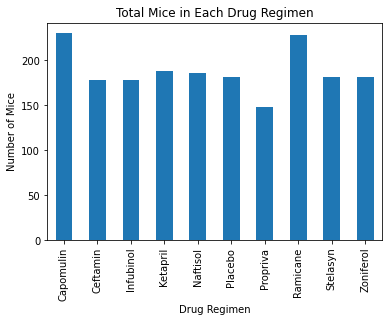

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#PANDAS

sum_mice= study_data_complete_dd_2.groupby(["Drug Regimen"]).count()["Mouse ID"]
sum_mice

bar = sum_mice.plot.bar(x='Drug Regimen', y='Mouse ID')

plt.title("Total Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

bar

<BarContainer object of 1 artists>

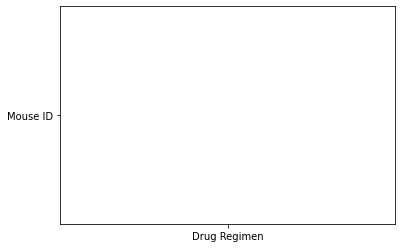

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#MATPLOTLIB 

df = pd.DataFrame(sum_mice) 
df




barm=plt.bar('Drug Regimen', "Mouse ID")
barm

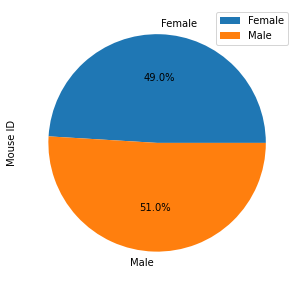

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#PANDAS

sex_mice= study_data_complete_dd_2.groupby("Sex").count()
sex_mice

plot=sex_mice.plot.pie(y='Mouse ID', autopct='%1.1f%%', figsize=(5,5))


<AxesSubplot:ylabel='Sex'>

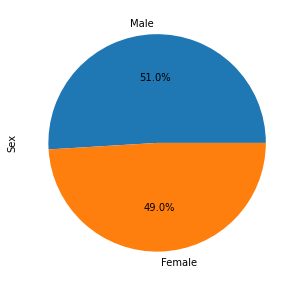

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#PANDAS

sex_mice_count= study_data_complete_dd_2["Sex"].value_counts()
sex_mice_count

sex_mice_count.plot(kind="pie", autopct='%1.1f%%', figsize=(5,5))



In [81]:
#MATPLOTLIB 



## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_3 = study_data_complete_dd_2.set_index('Timepoint')
df_3

df_4=df_3.sort_index(ascending=False)
df_4
         
# df_c = df_4.loc[lambda df_4: df_4["Drug Regimen"]=='Capomulin']
df_r = df_4.loc[lambda df_4: df_4["Drug Regimen"]=='Ramicane']
# df_i = df_4.loc[lambda df_4: df_4["Drug Regimen"]=='Infubinol']
# df_e = df_4.loc[lambda df_4: df_4["Drug Regimen"]=='Ceftamin']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Timepoint,,,,,,,
45,s508,30.276232,0,Ramicane,Male,1,17
45,z578,30.638696,0,Ramicane,Male,11,16
45,e662,40.659006,2,Ramicane,Male,8,24
45,m546,30.564625,1,Ramicane,Male,18,16
45,k403,22.050126,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...
0,a411,45.000000,0,Ramicane,Male,3,22
0,j913,45.000000,0,Ramicane,Female,4,17
0,q610,45.000000,0,Ramicane,Female,18,21


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in []:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [135]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_c_2 = study_data_complete_dd_2.loc[lambda study_data_complete_dd_2: study_data_complete_dd_2["Drug Regimen"]=='Capomulin']

df_c_2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [136]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#pull Capomulin data 
avg_tumor= df_c_2.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]


avg_tumor=avg_tumor.reset_index()
avg_tumor


,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


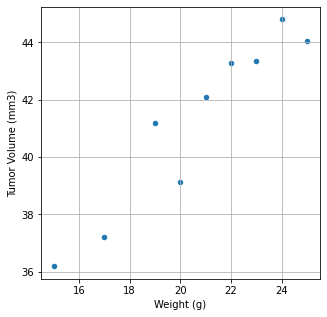

In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#scatter plot

avg_tumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(5,5))
plt.show()

## Correlation and Regression

In [149]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r=st.pearsonr(avg_tumor["Weight (g)"], avg_tumor["Tumor Volume (mm3)"])
print(r[0])


l=st.linregress(avg_tumor["Weight (g)"], avg_tumor["Tumor Volume (mm3)"])
print(l[2])

0.9505243961855265
0.9505243961855268
